# EDA and Regression Problem

## Imports

In [315]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.inspection import permutation_importance
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import KFold, cross_val_score 
from sklearn.base import clone

plt.rcParams["figure.figsize"] = (5,5)

import warnings
warnings.filterwarnings('ignore')

## Data Exploration

In [252]:
data_df = pd.read_csv("insurance.csv")

In [253]:
data_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [254]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [255]:
# Differentiate in to categorical and numerical columns
y_column = 'charges'
categorical_columns = ['sex', 'smoker', 'region']
numerical_columns = set(data_df.columns.to_list()) - set(categorical_columns) - set([y_column])
print(numerical_columns)

{'bmi', 'age', 'children'}


In [256]:
# If numeric data is not as object because of some numeric data, 
# use following to coerce it to numeric data

# Coerce data to Integer and replace non-int values with Nans
for col in numerical_columns:
    data_df[col] = pd.to_numeric(data_df[col], errors='coerce')
    print('{}: {} Nan values'.format(col, data_df[col].isnull().sum()))

bmi: 0 Nan values
age: 0 Nan values
children: 0 Nan values


In [257]:
# Quick check to see what missing values are in data
len(data_df.dropna())
#or
#data_df.isnull().sum()

1338

In [258]:
# If missing values are substantial, 
#may need to look at each column and see which column has most missing values
# And how to treat those, column by column

In [259]:
# Find if there are any unexpected values in each type
#for col in categorical_columns:
for col in data_df.columns: 
    print(f'********* {col} ********')
    print(data_df[col].unique())
          

********* age ********
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
********* sex ********
['female' 'male']
********* bmi ********
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 2

## Data Cleaning

In [260]:
# Handle any missing values

In [313]:
# Drop any duplicates
print(data_df.duplicated().sum())
# To look at duplicated row, do the following
#data_pd[data_df.duplicated()]
# Drop it
data_df.drop_duplicates(inplace=True)

0


## Target and Feature Exploration

* Look at distribution of variables - looking for any outliers
* How related are feature variables to target variable
    If features are completely unrelated, they can be removed
* Are feature variables correlated?
    If features are correlated, take a note of them. First train with everything. Then remove one of correlated features and retrain

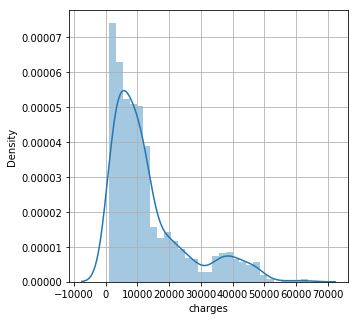

In [262]:
# Distribution of target variable
sns.distplot(data_df.charges)
plt.grid()

In [263]:
# Remove any outliers of target variable before fitting
# using quantile or std-devs

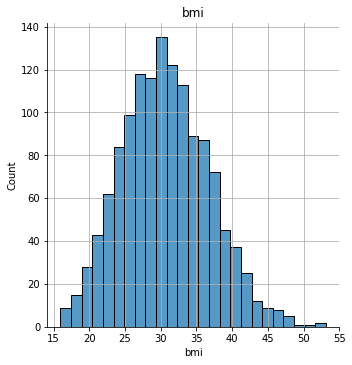

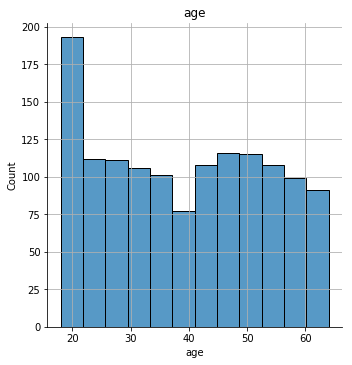

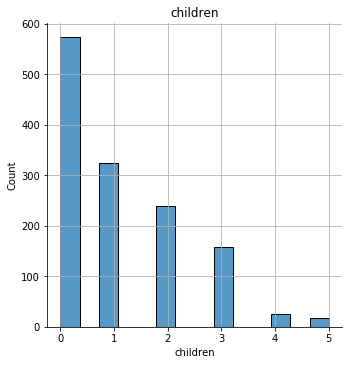

In [264]:
# Distribution of numerical variables
for col in numerical_columns:
    sns.displot(data_df, x=col)
    plt.title(col)
    plt.grid()
plt.show()

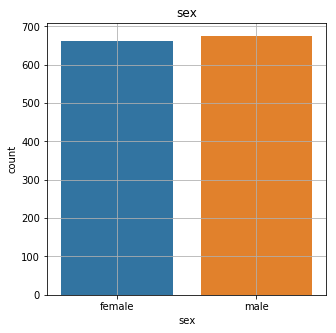

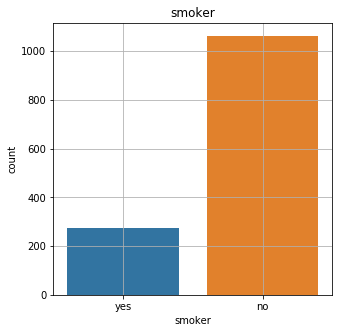

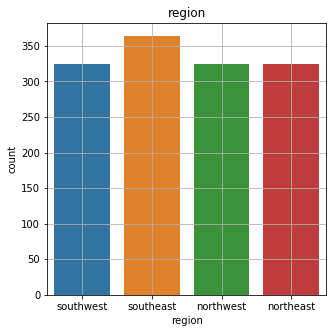

In [265]:
# Distribution of categorical variables
for col in categorical_columns:
    plt.figure()
    plt.title(col)
    sns.countplot(data=data_df, x=col)
    plt.grid(b=True)
plt.show()

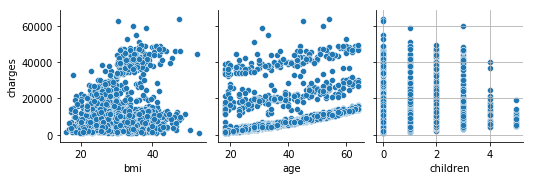

In [266]:
# Plot the numerical varaibles wrt target variable
sns.pairplot(data_df, x_vars = numerical_columns, y_vars = y_column)
plt.grid(b=True)
plt.show()

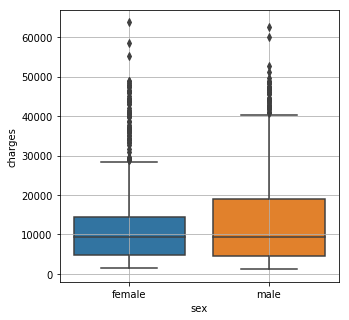

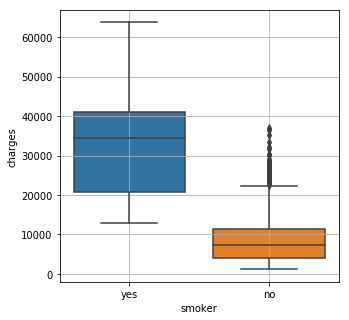

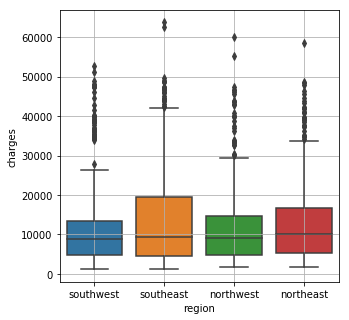

In [267]:
# Plot the distribution of the target variable wrt categorical variables
for col in categorical_columns:
    plt.figure()
    sns.boxplot(data=data_df, x=col, y=y_column)
    plt.grid(b= True)
plt.show()

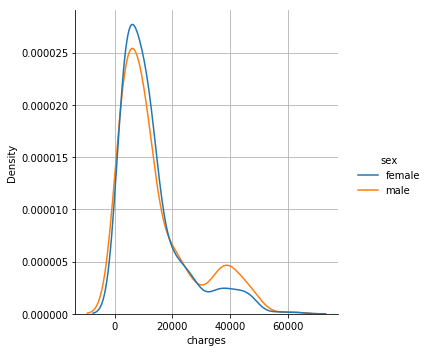

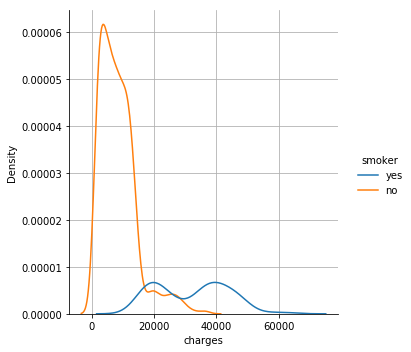

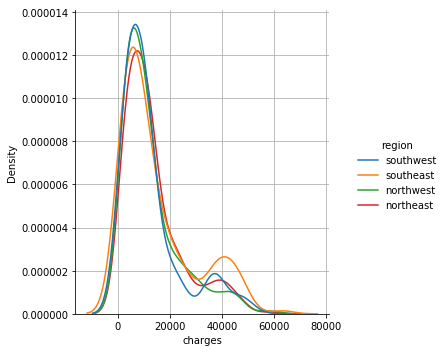

In [268]:
# Plot the distribution of the target variable wrt categorical variables
for col in categorical_columns:
    sns.displot(data_df, x=y_column, hue=col, kind="kde")
    plt.grid()
plt.show()

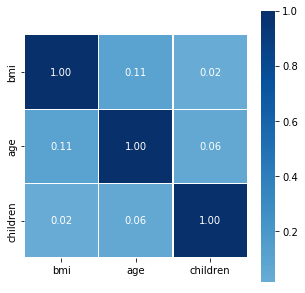

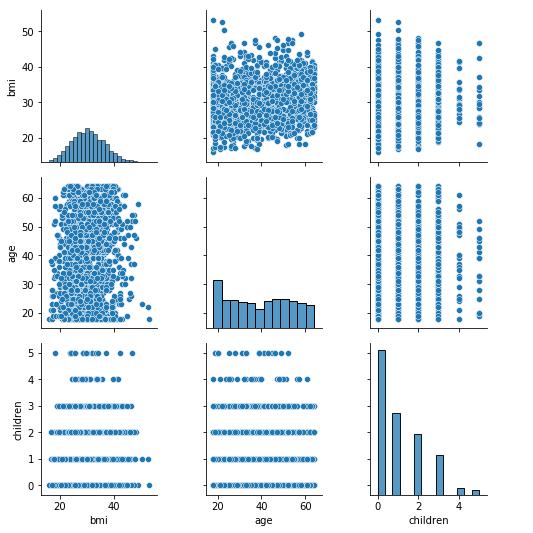

In [269]:
# Correlation between numerical variables
# Correlation analysis
data_dt_num_xcorr = data_df[numerical_columns].corr(method='spearman')
sns.heatmap(data_dt_num_xcorr, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.2, annot=True, cmap=plt.cm.Blues)
# Pair-plot
sns.pairplot(data_df, x_vars = numerical_columns, y_vars = numerical_columns)
plt.grid(b=True)

plt.show()

## Feature Transformations

In [270]:
# Convert categorical variables in to one-hot encoded expressions
data_df = pd.get_dummies(data_df, columns = categorical_columns)

# For binary column, keep only one of the columns
data_df.drop(labels='sex_male', axis=1, inplace=True)
data_df.rename({'sex_female': 'sex'}, axis=1, inplace=True)

data_df.drop(labels='smoker_no', axis=1, inplace=True)
data_df.rename({'smoker_yes': 'smoker'}, axis=1, inplace=True)

In [271]:
data_df.head()

,age,bmi,children,charges,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,1,0,0,0,1
1,18,33.770,1,1725.55230,0,0,0,0,1,0
2,28,33.000,3,4449.46200,0,0,0,0,1,0
3,33,22.705,0,21984.47061,0,0,0,1,0,0
4,32,28.880,0,3866.85520,0,0,0,1,0,0


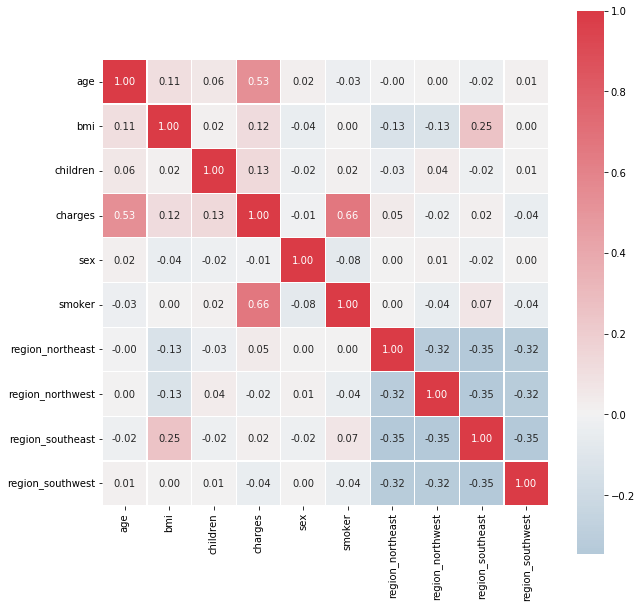

In [272]:
# Now that we have converted everything to numerical variables, do a correlation analysis again
data_dt_num_xcorr = data_df.corr(method='spearman')

plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(data_dt_num_xcorr, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.2, annot=True, cmap=sns.diverging_palette(240,10,as_cmap=True))


plt.show()

In [273]:
# Do some feature scaling for numerical variables

# Normalization for bmi
scaler = StandardScaler()
data_df['bmi'] = scaler.fit_transform(data_df['bmi'].to_numpy().reshape(-1,1))
print('BMI Mean is {} and Std is {}'.format(data_df.bmi.mean(), data_df.bmi.std()))

# Standard scalar for age and number of children
for col in ['age', 'children']:
    mmscaler = MinMaxScaler()
    data_df[col] = mmscaler.fit_transform(data_df[col].to_numpy().reshape(-1,1))
    print('{} Min is {} and Max is {}'.format(col, data_df[col].min(), data_df[col].max()))


BMI Mean is -2.2852159788843913e-16 and Std is 1.0003741814911118
age Min is 0.0 and Max is 1.0
children Min is 0.0 and Max is 1.0


In [274]:
data_df.drop(labels=y_column, axis=1).head()

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,-0.453160,0.0,1,1,0,0,0,1
1,0.000000,0.509422,0.2,0,0,0,0,1,0
2,0.217391,0.383155,0.6,0,0,0,0,1,0
3,0.326087,-1.305052,0.0,0,0,0,1,0,0
4,0.304348,-0.292456,0.0,0,0,0,1,0,0


## Modeling

In [275]:
# Split data in to test, train set
data_train_x,data_test_x, data_train_y,data_test_y = train_test_split(data_df.drop(labels=y_column,axis=1),
                                                                      data_df[[y_column]],test_size=0.25)
print(len(data_train_x), len(data_test_x))
print(len(data_train_y), len(data_test_y))

1002 335
1002 335


In [276]:
# Train a linear regression model
reg_model = LinearRegression().fit(data_train_x, data_train_y)
y_train_predict = reg_model.predict(data_train_x)
reg_model_train_r2 = r2_score(data_train_y, y_train_predict)
print('Training R2 is {:.2f}'.format(reg_model_train_r2))
y_test_predict = reg_model.predict(data_test_x)
reg_model_test_r2 = r2_score(data_test_y, y_test_predict)
print('Test R2 is {:.2f}'.format(reg_model_test_r2))

Training R2 is 0.73
Test R2 is 0.80


In [277]:
# Look at feature importances
def plot_feature_importances(importance_values, labels):
    """
    Plots sorted feature importances
    importance_values: importance of different features
    labels: Feature labels
    """
    sorted_idx = importance_values.argsort()
    indices = np.arange(0, len(labels)) + 0.5
    plt.barh(indices, importance_values[sorted_idx])
    plt.yticks(indices, labels[sorted_idx])
    plt.grid(b=True)
    plt.ylim((0, len(labels)))

In [278]:
# Plot Errors
def plot_errors(train_predict, train_y, test_predict, test_y):
    plt.scatter(train_predict,train_predict - train_y,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
    plt.scatter(test_predict,test_predict - test_y,
              c = 'c', marker = 'o', s = 35, alpha = 0.7,
              label = 'Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Differences')
    plt.grid(b=True)
    plt.legend()
    plt.show()

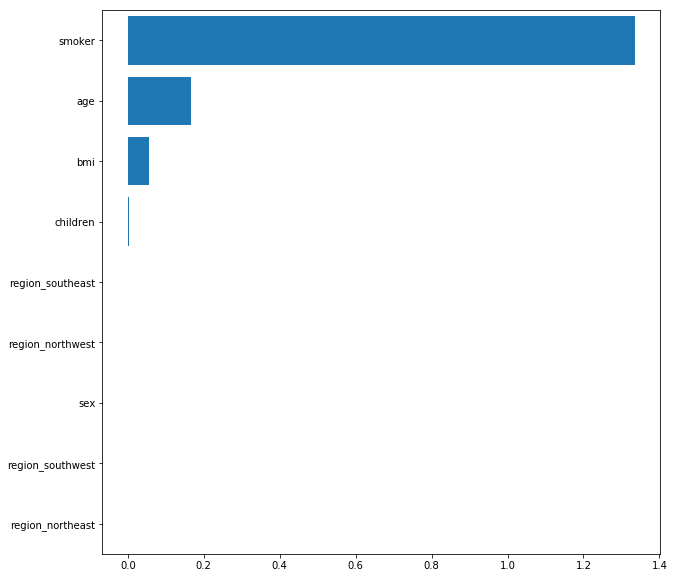

In [279]:
# Find the importance of features using permutation importance
lr_importance = permutation_importance(reg_model, data_test_x, data_test_y, scoring='r2', 
                       n_repeats=10, random_state=0)
plot_feature_importances(lr_importance.importances_mean, data_test_x.columns )

In [280]:
# Lets drop region and retry
cols_to_drop = [y_column, 'region_southeast', 'region_northwest', 'region_northeast', 'region_southwest']
data_train_x,data_test_x, data_train_y,data_test_y = train_test_split(data_df.drop(labels=cols_to_drop,axis=1),
                                                                      data_df[[y_column]],test_size=0.25)
reg_model = LinearRegression().fit(data_train_x, data_train_y)
y_train_predict = reg_model.predict(data_train_x)
reg_model_train_r2 = r2_score(data_train_y, y_train_predict)
print('Training R2 is {:.2f}'.format(reg_model_train_r2))
y_test_predict = reg_model.predict(data_test_x)
reg_model_test_r2 = r2_score(data_test_y, y_test_predict)
print('Test R2 is {:.2f}'.format(reg_model_test_r2))

Training R2 is 0.75
Test R2 is 0.75


In [281]:
# Use polynomial features
quad = PolynomialFeatures(degree = 2)
x_quad = quad.fit_transform(data_df.drop(labels=cols_to_drop,axis=1))
data_train_x,data_test_x, data_train_y,data_test_y = train_test_split(x_quad,
                                                                      data_df[[y_column]],test_size=0.25)
reg_model = LinearRegression().fit(data_train_x, data_train_y)
y_train_predict = reg_model.predict(data_train_x)
reg_model_train_r2 = r2_score(data_train_y, y_train_predict)
print('Training R2 is {:.2f}'.format(reg_model_train_r2))
y_test_predict = reg_model.predict(data_test_x)
reg_model_test_r2 = r2_score(data_test_y, y_test_predict)
print('Test R2 is {:.2f}'.format(reg_model_test_r2))

Training R2 is 0.84
Test R2 is 0.84


In [282]:
# Random Forest Regression
rf_model = RandomForestRegressor().fit(data_train_x, data_train_y)
y_train_predict = rf_model.predict(data_train_x)
rf_model_train_r2 = r2_score(data_train_y, y_train_predict)
print('Training R2 is {:.2f}'.format(rf_model_train_r2))
y_test_predict = rf_model.predict(data_test_x)
rf_model_test_r2 = r2_score(data_test_y, y_test_predict)
print('Test R2 is {:.2f}'.format(rf_model_test_r2))

Training R2 is 0.97
Test R2 is 0.84


In [283]:
np.shape(data_train_y.values.ravel())

(1002,)

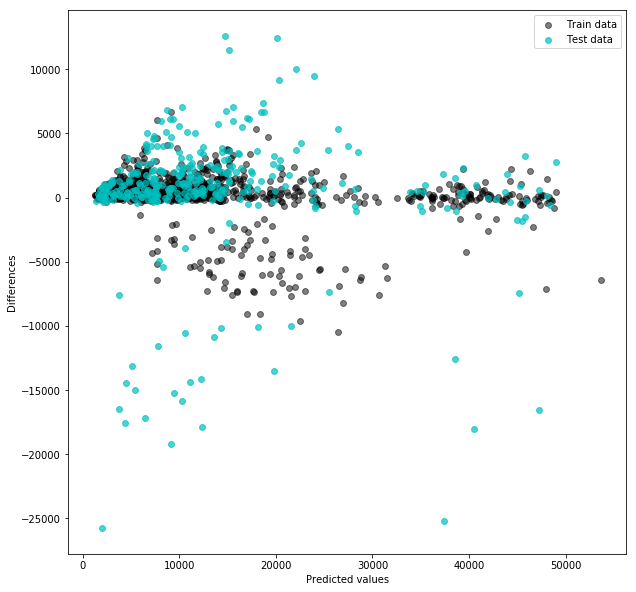

In [284]:
plot_errors(y_train_predict,data_train_y.values.ravel(), \
            y_test_predict,data_test_y.values.ravel())

In [285]:
# Try Lasso and Ridge
# Go thru all open ppts to see if everything is covered.

In [286]:
data_train_x,data_test_x, data_train_y,data_test_y = train_test_split(data_df.drop(labels=y_column,axis=1),
                                                                      data_df[[y_column]],test_size=0.25)
ridge_model = Lasso().fit(data_train_x, data_train_y)
y_train_predict = ridge_model.predict(data_train_x)
reg_model_train_r2 = r2_score(data_train_y, y_train_predict)
print('Training R2 is {:.2f}'.format(reg_model_train_r2))
y_test_predict = ridge_model.predict(data_test_x)
reg_model_test_r2 = r2_score(data_test_y, y_test_predict)
print('Test R2 is {:.2f}'.format(reg_model_test_r2))

Training R2 is 0.76
Test R2 is 0.72


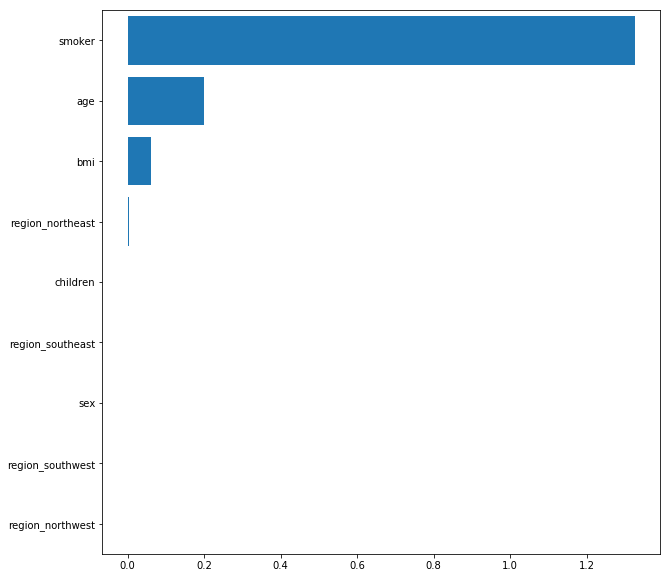

In [287]:
# Find the importance of features using permutation importance
lr_importance = permutation_importance(ridge_model, data_test_x, data_test_y, scoring='r2', 
                       n_repeats=10, random_state=0)
plot_feature_importances(lr_importance.importances_mean, data_test_x.columns )

## Testing a set of models

Text(0.5,1,'Test')

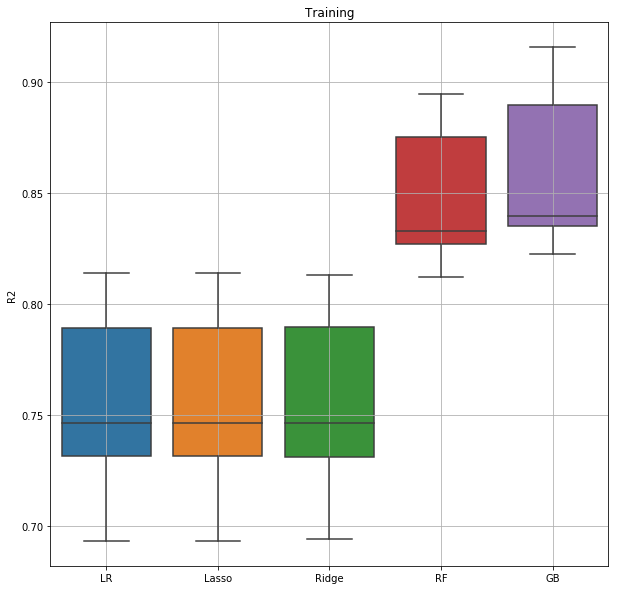

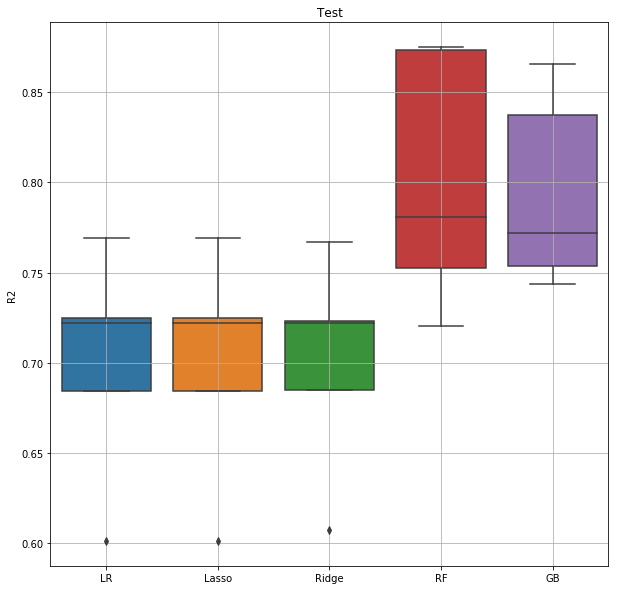

In [288]:
from sklearn.model_selection import KFold, cross_val_score 
from sklearn.base import clone

clfs = [LinearRegression(),
        Lasso(),
        Ridge(),
        RandomForestRegressor(),
        GradientBoostingRegressor()]

clf_names = ['LR', 'Lasso', 'Ridge', 'RF', 'GB']

# Stratified cross validation using 5 folds
cv = KFold(n_splits=5,random_state=2,shuffle=True)

# Preset scores for all methods
all_scores_train = np.zeros((len(clf_names), cv.n_splits))
all_scores_test = np.zeros((len(clf_names), cv.n_splits))

for i in range(len(clfs)):
    clf = clone(clfs[i])
    scores_train = cross_val_score(clf, data_train_x, data_train_y,  cv=cv, scoring='r2')
    all_scores_train[i] = scores_train
    scores_test = cross_val_score(clf, data_test_x, data_test_y,  cv=cv, scoring='r2')
    all_scores_test[i] = scores_test
    
plt.figure()
sns.boxplot(data=pd.DataFrame(all_scores_train.T, columns=clf_names))
plt.grid(b=True)
plt.ylabel('R2')
plt.title('Training')

plt.figure()
sns.boxplot(data=pd.DataFrame(all_scores_test.T, columns=clf_names))
plt.grid(b=True)
plt.ylabel('R2')
plt.title('Test')

## Using dimensionality reduction

In [308]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=7)
x_pca = pca_model.fit_transform(data_df.drop(labels=y_column,axis=1))
plt.rcParams["figure.figsize"] = (5,5)
np.sum(pca_model.explained_variance_ratio_)

0.9750757619937195

Text(0.5,1,'Test')

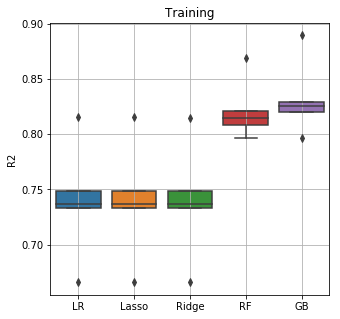

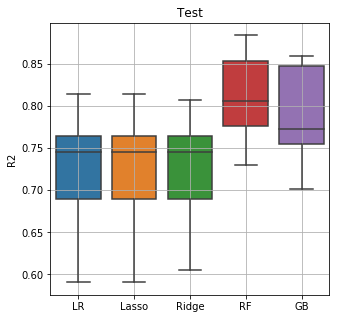

In [309]:
data_train_x,data_test_x, data_train_y,data_test_y = train_test_split(x_pca,
                                                                      data_df[[y_column]],test_size=0.25)

clfs = [LinearRegression(),
        Lasso(),
        Ridge(),
        RandomForestRegressor(),
        GradientBoostingRegressor()]

clf_names = ['LR', 'Lasso', 'Ridge', 'RF', 'GB']

# Stratified cross validation using 5 folds
cv = KFold(n_splits=5,random_state=2,shuffle=True)

# Preset scores for all methods
all_scores_train = np.zeros((len(clf_names), cv.n_splits))
all_scores_test = np.zeros((len(clf_names), cv.n_splits))

for i in range(len(clfs)):
    clf = clone(clfs[i])
    scores_train = cross_val_score(clf, data_train_x, data_train_y,  cv=cv, scoring='r2')
    all_scores_train[i] = scores_train
    scores_test = cross_val_score(clf, data_test_x, data_test_y,  cv=cv, scoring='r2')
    all_scores_test[i] = scores_test
    
plt.figure()
sns.boxplot(data=pd.DataFrame(all_scores_train.T, columns=clf_names))
plt.grid(b=True)
plt.ylabel('R2')
plt.title('Training')

plt.figure()
sns.boxplot(data=pd.DataFrame(all_scores_test.T, columns=clf_names))
plt.grid(b=True)
plt.ylabel('R2')
plt.title('Test')